In [9]:
from tensorflow.keras.models import load_model
import requests
from matplotlib import pyplot as plt
from tensorflow import io
import tensorflow as tf


In [10]:
# settings

save_folder = "../data/saved"
model_name = "effnet1"


In [11]:
model = load_model(f"{save_folder}/{model_name}")

In [12]:
print(list(model.signatures.keys()))

['serving_default']


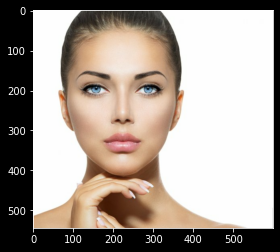

In [17]:


response = requests.get("https://st.depositphotos.com/1491329/3629/i/600/depositphotos_36297389-stock-photo-beauty-portrait-beautiful-spa-woman.jpg")
image = io.decode_image(response.content, channels = 3, expand_animations = False)
plt.imshow(image)
image = tf.expand_dims(image, axis=0)
image = tf.image.resize(image, (224, 224))

In [20]:
pred = model.predict(image)
if pred[0][0] > pred[0][1]:
    infer = "With Mask"
else:
    infer = "Without Mask"

print(infer)


Without Mask
